In [1]:
!pip install numpy pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 5.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 575.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 203.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 220.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 242.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 189.4 kB/s eta 0:00:0000:0100:01


In [2]:
import os

'/home/jovyan/work'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


images = os.listdir('/home/jovyan/data/archive/rtsd-frames/rtsd-frames')
print(images[:10])

['autosave01_02_2012_09_13_32.jpg', 'autosave01_02_2012_09_13_33.jpg', 'autosave01_02_2012_09_13_34.jpg', 'autosave01_02_2012_09_13_35.jpg', 'autosave01_02_2012_09_13_36.jpg', 'autosave01_02_2012_09_13_37.jpg', 'autosave01_02_2012_09_13_38.jpg', 'autosave01_02_2012_09_13_39.jpg', 'autosave01_02_2012_09_13_40.jpg', 'autosave01_02_2012_09_13_41.jpg']


In [4]:
gt_labels = pd.read_csv('/home/jovyan/data/archive/rtsd-frames/full-gt.csv')

In [5]:
print("Unique classes:", len(gt_labels.sign_class.unique()))
print("Most frequent class:", gt_labels.sign_class.mode()[0])

Unique classes: 198
Most frequent class: 5_19_1


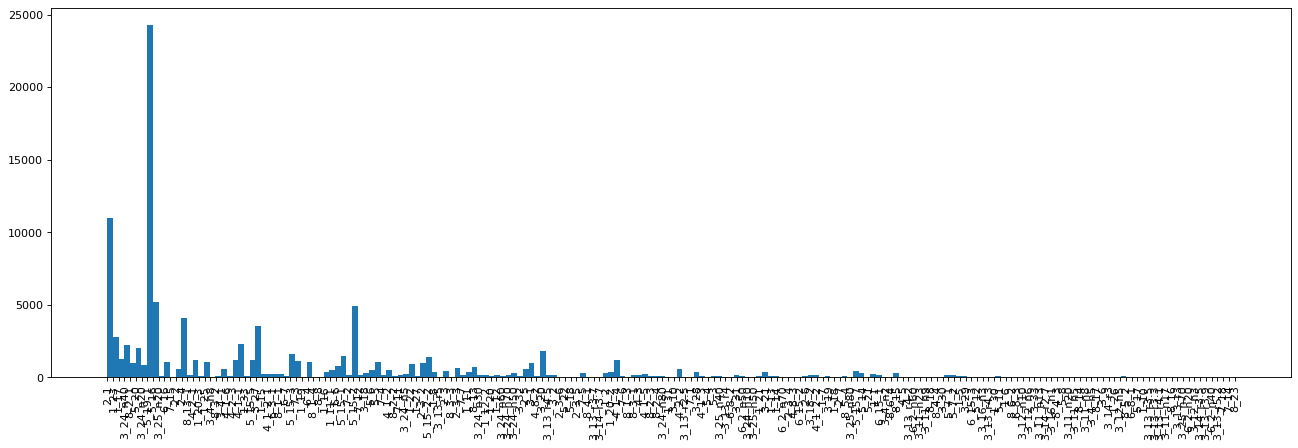

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 6), dpi=80)
plt.hist(gt_labels.sign_class, bins=198)
plt.xticks(rotation=90)
plt.show()

In [8]:
gt_labels[gt_labels.filename == 'autosave16_10_2012_08_47_14_1.jpg']

,filename,x_from,y_from,width,height,sign_class,sign_id
71062,autosave16_10_2012_08_47_14_1.jpg,683,225,38,36,2_4,4492
71063,autosave16_10_2012_08_47_14_1.jpg,682,268,34,36,5_6,4493


autosave01_02_2012_09_13_33.jpg


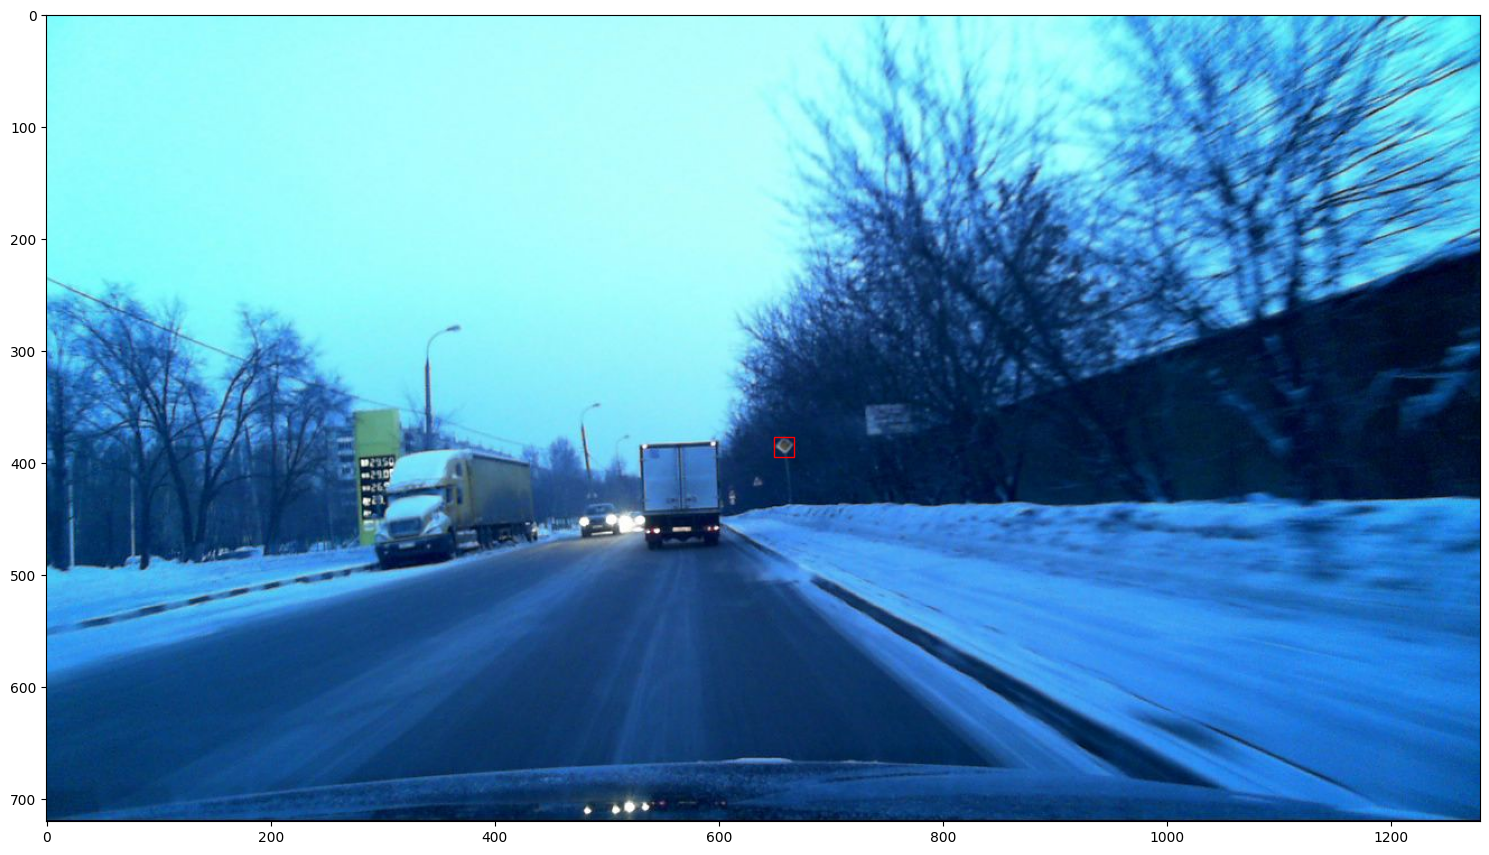

In [10]:
from PIL import Image
import matplotlib.patches as patches

root_dir = '/home/jovyan/data/archive/rtsd-frames/rtsd-frames/'
print(images[1])

im_labels = gt_labels[gt_labels.filename == images[1]].iloc[0]

im = Image.open(root_dir + images[1])
# Create figure and axes
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((im_labels.x_from, im_labels.y_from), im_labels.width, im_labels.height, linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()